In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer, SimpleImputer
import miceforest as mf
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv(r'https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv', na_values="na")

In [7]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [8]:
df.shape

(36188, 171)

In [9]:
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

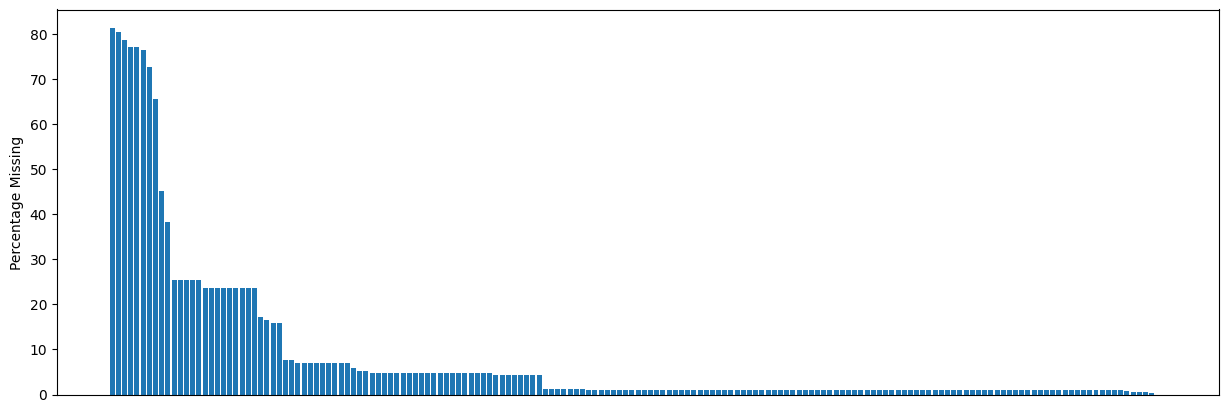

In [11]:
# Plot missing values count for each column

fig,ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage Missing")
plt.show()

In [12]:
# Dropping columns which has more than 70% missing values

dropCols = missing[missing[0] > 70]
dropCols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [13]:
df.drop(list(dropCols.index), axis=1, inplace=True)

In [14]:
df.shape

(36188, 164)

In [15]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print("Percentage of total missing cells in the data {}%".format((total_missing/total_cells)*100))

Percentage of total missing cells in the data 5.37059852747306%


Postitve: 1000, Negative: 35188


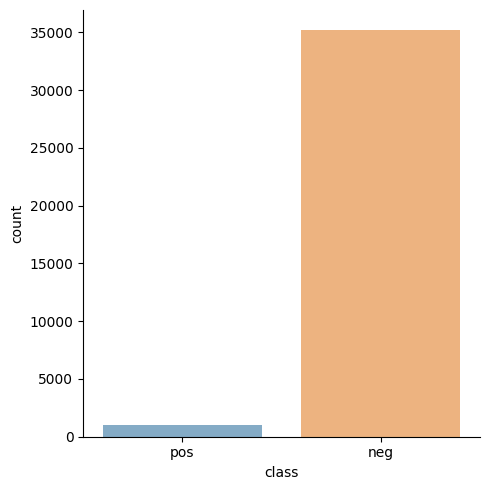

In [16]:
pos = df[df['class'] == 'pos'].shape[0]
neg = df[df['class'] == 'neg'].shape[0]
print("Postitve: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data = df, x = "class", kind="count", alpha=0.6)
plt.show()

### Will use smote technique to handle oversampling of data that can be seen here

In [17]:
def evaluate_scores(true,predicted):
  
  acc = accuracy_score(true,predicted)
  f1 = f1_score(true,predicted)
  precision = precision_score(true,predicted)
  recall = recall_score(true,predicted)
  roc_auc = roc_auc_score(true,predicted)
  
  return acc,f1,precision,recall,roc_auc

In [18]:
def total_cost(y_true, y_pred):
  
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  cost = 10*fp + 500*fn
  return cost 

In [33]:
def evaluate_models(X,y,models):
  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
  cost_list=[]
  models_list = []    
  accuracy_list = []
    
  for i in range(len(list(models))):
      model = list(models.values())[i]
      model.fit(X_train, y_train)
        
      y_train_pred = model.predict(X_train)
      y_test_pred = model.predict(X_test)
        
      model_train_accuracy, model_train_f1,model_train_precision,\
      model_train_recall,model_train_rocauc_score=evaluate_scores(y_train ,y_train_pred)
      train_cost = total_cost(y_train, y_train_pred)

      model_test_accuracy,model_test_f1,model_test_precision,\
      model_test_recall,model_test_rocauc_score=evaluate_scores(y_test, y_test_pred)
      test_cost = total_cost(y_test, y_test_pred)

      print(list(models.keys())[i])
      models_list.append(list(models.keys())[i])

      print('Model performance for Training set')
      print("- Accuracy: {:.4f}".format(model_train_accuracy))
      print('- F1 score: {:.4f}'.format(model_train_f1)) 
      print('- Precision: {:.4f}'.format(model_train_precision))
      print('- Recall: {:.4f}'.format(model_train_recall))
      print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
      print(f'- COST: {train_cost}.')

      print('Model performance for Test set')
      print('- Accuracy: {:.4f}'.format(model_test_accuracy))
      print('- F1 score: {:.4f}'.format(model_test_f1))
      print('- Precision: {:.4f}'.format(model_test_precision))
      print('- Recall: {:.4f}'.format(model_test_recall))
      print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
      print(f'- COST: {test_cost}.')
      cost_list.append(test_cost)
      print('='*35)
        
  report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
  return report
    

In [20]:
## This will plot 170 graphs as the number of numeric features and will provide us the distribution of values in each column
## Run at your own risk takes atleast 5 mins
## distplot in this is deprecated change to displot 

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# plt.figure(figsize=(15,100))
# for i , col in enumerate(numeric_features):
#   plt.subplot(60,3,i+1)
#   sns.distplot(x=df[col], color = 'indianred')
#   plt.xlabel(col, weight='bold')
#   plt.tight_layout()

In [21]:
X = df.drop('class', axis=1)
y = df['class']

In [22]:
y = y.replace({'pos': 1, 'neg': 0})

## Stratergy 1

In [23]:
# Fit with robust scaler for KNN K-Selection

robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(X)

This tries to fix the the empty values on the basis of neighbouring value
This code will take alot of time but is necessary for fixing the values
Run only once as will take hours to run this even on a good machine

In [24]:
# results = []

# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# strategies = [str(i) for i in [1,3,5,7]]
# for s in strategies:
#   pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
#   scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=1)
#   results.append(scores)
#   print("n_neighbours: {} || accuracy_score: {:.4f}".format(int(s), mean(scores)))

In [25]:
# We have maximum accuracy when number of neighbours is 3 

num_features = X.select_dtypes(exclude="object").columns

knn_pipeline = Pipeline(steps=[
  ('imputer', KNNImputer(n_neighbors=3)),
  ('robustScaler', RobustScaler())
])

In [26]:
X_knn = knn_pipeline.fit_transform(X)

#### Will use Smote Tomek to remove overlapping data points also will create synthetic data for minority class and remove excess data from majority class

In [27]:
# Resampling minority class.

smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=1)

X_res, y_res = smt.fit_resample(X_knn, y)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


#### Create list of default models that can be used

In [35]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [36]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
Model performance for Test set
- Accuracy: 0.9929
- F1 score: 0.9929
- Precision: 0.9891
- Recall: 0.9967
- Roc Auc Score: 0.9929
- COST: 12270.
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
Model performance for Test set
- Accuracy: 0.9860
- F1 score: 0.9861
- Precision: 0.9807
- Recall: 0.9916
- Roc Auc Score: 0.9860
- COST: 30870.
Gradient Boosting
Model performance for Training set
- Accuracy: 0.9838
- F1 score: 0.9839
- Precision: 0.9808
- Recall: 0.9869
- Roc Auc Score: 0.9838
- COST: 189410.
Model performance for Test set
- Accuracy: 0.9838
- F1 score: 0.9839
- Precision: 0.9804
- Recall: 0.9873
- Roc Auc Score: 0.9838
- COST: 45880.


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.6761
- F1 score: 0.7399
- Precision: 0.6182
- Recall: 0.9214
- Roc Auc Score: 0.6760
- COST: 1262250.
Model performance for Test set
- Accuracy: 0.6723
- F1 score: 0.7378
- Precision: 0.6145
- Recall: 0.9230
- Roc Auc Score: 0.6726
- COST: 310580.
K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9814
- F1 score: 0.9816
- Precision: 0.9708
- Recall: 0.9927
- Roc Auc Score: 0.9814
- COST: 110880.
Model performance for Test set
- Accuracy: 0.9743
- F1 score: 0.9747
- Precision: 0.9604
- Recall: 0.9894
- Roc Auc Score: 0.9744
- COST: 39860.
XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
Model performance for Test set
- Accuracy: 0.9960
- F1 score: 0.9960
- Precision: 0.9938
- Recall: 0.9983
- Roc Auc Score: 0.9960
- COST: 6440.
CatBoosting Classifier
Model performance for Training set
- Ac

In [38]:
report_knn

,Model Name,Cost
5,XGBClassifier,6440
6,CatBoosting Classifier,9630
0,Random Forest,12270
1,Decision Tree,30870
4,K-Neighbors Classifier,39860
2,Gradient Boosting,45880
7,AdaBoost Classifier,93210
3,Logistic Regression,310580


### Stratergy 2

In [41]:
num_features = X.select_dtypes(exclude="object").columns
num_features

median_pipeline = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('robustScaler', RobustScaler())
])

In [42]:
X_median = median_pipeline.fit_transform(X)

In [43]:
smt = SMOTETomek(random_state=42, sampling_strategy='minority')

X_res, y_res = smt.fit_resample(X_median, y)

In [44]:
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
Model performance for Test set
- Accuracy: 0.9909
- F1 score: 0.9911
- Precision: 0.9859
- Recall: 0.9963
- Roc Auc Score: 0.9909
- COST: 14010.
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
Model performance for Test set
- Accuracy: 0.9859
- F1 score: 0.9861
- Precision: 0.9808
- Recall: 0.9914
- Roc Auc Score: 0.9858
- COST: 31870.
Gradient Boosting
Model performance for Training set
- Accuracy: 0.9840
- F1 score: 0.9840
- Precision: 0.9813
- Recall: 0.9867
- Roc Auc Score: 0.9840
- COST: 190760.
Model performance for Test set
- Accuracy: 0.9810
- F1 score: 0.9812
- Precision: 0.9757
- Recall: 0.9868
- Roc Auc Score: 0.9809
- COST: 48240.
Logistic Regression
Model performance for Training set
- Accuracy: 0.6737
- F1 

In [45]:
report_median

,Model Name,Cost
5,XGBClassifier,5470
6,CatBoosting Classifier,6270
0,Random Forest,14010
1,Decision Tree,31870
2,Gradient Boosting,48240
4,K-Neighbors Classifier,54430
7,AdaBoost Classifier,87120
3,Logistic Regression,317420


### Stratergy 3

In [46]:
X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  save_all_iterations=True,
  random_state=1999
)
kernel.mice(3)

In [ ]:
X_mice = kernel.complete_data()

In [ ]:
mice_pipeline = Pipeline(steps=[
  ('robustScaler', RobustScaler())
])

In [ ]:
X_mice = mice_pipeline.fit_transform(X_mice)

In [ ]:
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)

X_res, y_res = smt.fit_resample(X_mice,y)

In [ ]:
report_mice = evaluate_models(X_res, y_res, models)

In [ ]:
report_mice

### Stratergy 4